In [134]:
#laoding libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('employee_data.csv',sep="\t")
df.head()

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
0,39,State-gov,77516,Bachelors,Never-married,Not-in-family,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Husband,Male,13
2,38,Private,215646,HS-grad,Divorced,Not-in-family,Male,40
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
4,28,Private,338409,Bachelors,Married-civ-spouse,Wife,Female,40


In [135]:
print(df.columns)
print(df.shape)


Index(['age', 'employment_type', 'salary', 'education', 'marital-status',
       'relationship', 'Gender', 'hours_per_week'],
      dtype='object')
(978, 8)


PROBLEM#1: Identify categorical variables and continous variables

In [136]:
#CONTINUOUS DATA
df1=df[df._get_numeric_data().columns].head(10)
df1

,age,salary,hours_per_week
0,39,77516,40
1,50,83311,13
2,38,215646,40
3,53,234721,40
4,28,338409,40
5,37,284582,40
6,49,160187,16
7,52,209642,45
8,31,45781,50
9,42,159449,40


In [137]:
#CATEGORIAL VARIABLES DATA
#1 Unique value of employement data
df['employment_type'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc'], dtype=object)

In [138]:
#2 Unique value of education data
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [139]:
#3 Unique value of marital status data
df['marital-status'].unique()


array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [123]:
#4 Unique value of realtionships of employee
df['relationship'].unique()


array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [140]:
#5 Gender of employees
df['Gender'].unique()


array([' Male', ' Female'], dtype=object)

PROBLEM #2: Univariate analysis on all Variables.Use bar plots for categorical variables &histogram or line plot for continous ones.Label the plot and axis clearly for intuitive understanding .Mention the observation drawn from each Univariate plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe81c592a20>,
      dtype=object)

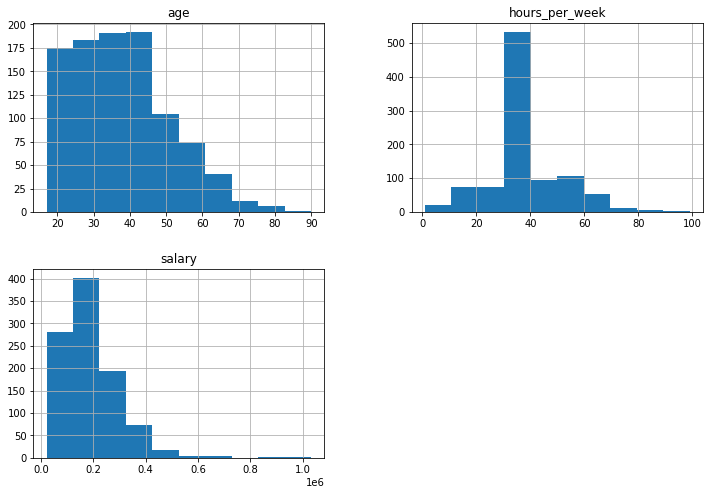

In [124]:
#UNIVARIATE PLOTS ANALYSIS
df.hist(figsize=(12,8))


OBSERVATION FROM GRAPH 1,2,3:

.Maximum age of the employees are in the span of 20-45.               
.There is some employees have the salary above 450000.

.Maximum employees worked for 30 to 40 hours a week

.Among all 100 emloyees are working in the10 to 70 hours a week
.

Text(0, 0.5, 'NO. OF EMPLOYEES')

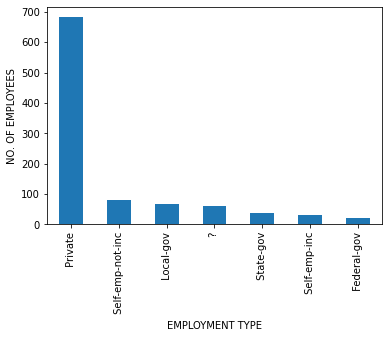

In [125]:
z=df['employment_type'].value_counts().plot(kind='bar')
z.set_xlabel('EMPLOYMENT TYPE')
z.set_ylabel('NO. OF EMPLOYEES')

Inference drawn:Number of employee is maximum in private category

Text(0, 0.5, 'NO.OF EMPLOYEES')

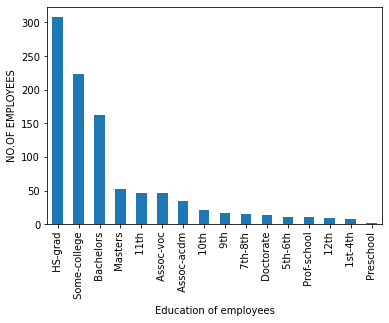

In [126]:
z1=df['education'].value_counts().plot(kind='bar')
z1.set_xlabel('Education of employees')
z1.set_ylabel('NO.OF EMPLOYEES')


Inference:number of employees are maximum in HS_grade category

Text(0, 0.5, 'NO OF EMPLOYEES')

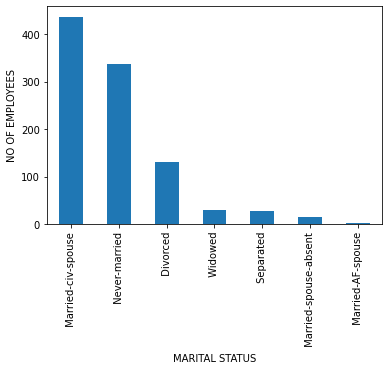

In [84]:
z2=df['marital-status'].value_counts().plot(kind='bar')
z2.set_xlabel('MARITAL STATUS')
z2.set_ylabel('NO OF EMPLOYEES')

Inference:Number of employee is maximum in Married-civ-spouse category

Text(0, 0.5, 'No.of employee')

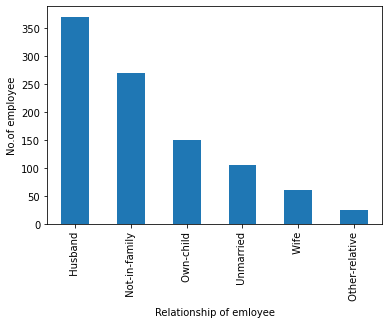

In [85]:
z3=df['relationship'].value_counts().plot(kind='bar')
z3.set_xlabel('Relationship of emloyee')
z3.set_ylabel('No.of employee')

Text(0, 0.5, 'No of employee')

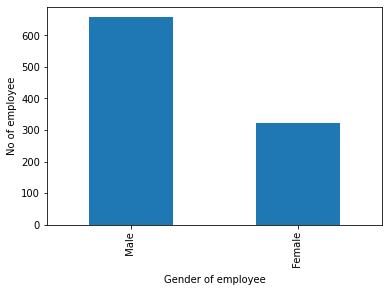

In [86]:
z4=df['Gender'].value_counts().plot(kind='bar')
z4.set_xlabel('Gender of employee')
z4.set_ylabel('No of employee')

Inference:Number of male employees are maximum male rather than female

PROBLEM #3: Show a bivariate analysis between salary and hours_per_week.choose a plot of your choice and draw inferences from them.

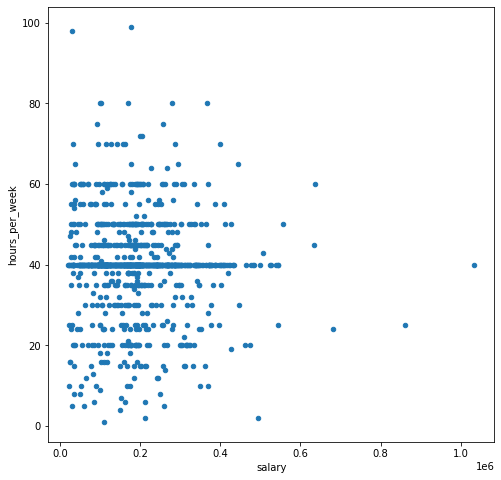

In [128]:
df5=df.plot(kind='scatter',x='salary',y='hours_per_week',figsize=(8,8))
df5

Inference :
1)Those employees having salaries below 4,00,000 work at least 25 to 50 hours a week.                                             
2)Employees working around 40 hours a week earns comparatively higher salary.

PROBLEM #4:For each education type,showcase the distribtion of salary.use seaborn facetgrid and lineplot.Identify the key observation and mention them.

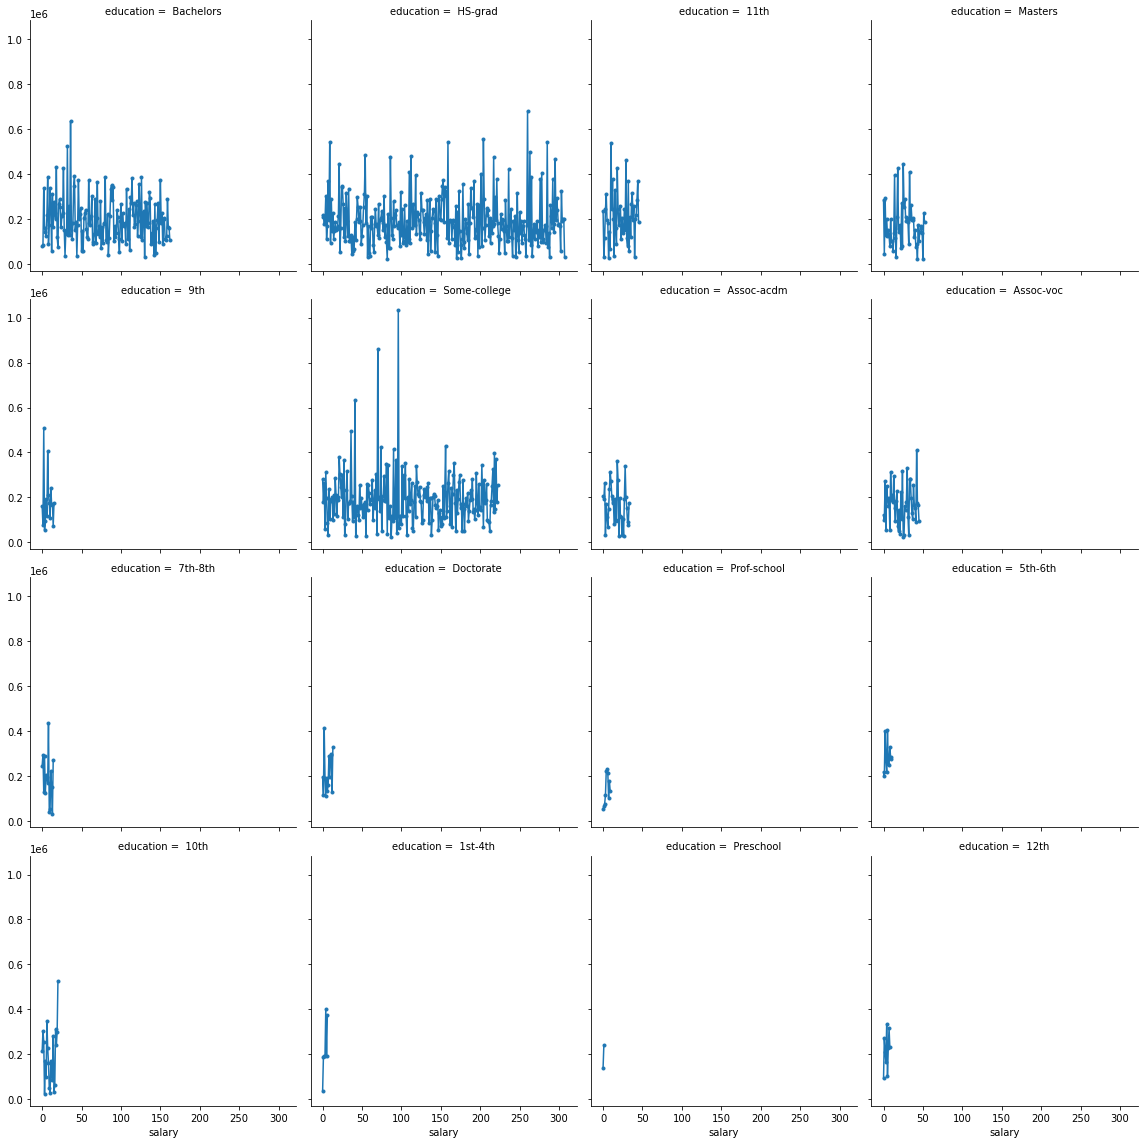

In [129]:
fg=sns.FacetGrid(df,col='education',col_wrap=4,height=4)
fg=fg.map(plt.plot,'salary',marker='.')

Inference:1)Hs-grad employees have lesser amount of saalries among others.                           
2)Most of the employees gets salary below 50000

#PROBLEM #5:Categorizing each gender and relationship status(combining of all values),plot the hours per week worked .choose aproriae plots and draw inferences drawn from them.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe81ee43400>],
      dtype=object)

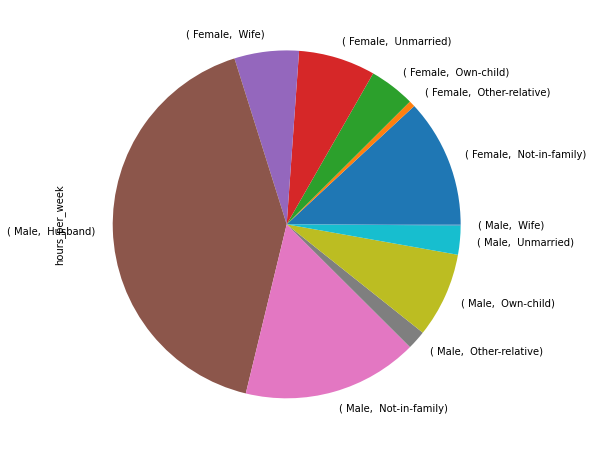

In [130]:
df.groupby(['Gender','relationship'])['hours_per_week'].sum().plot(kind='pie',subplots=True,figsize=(8,8))

Problem #6: How many males that have Martial status 'Married _civ_spouse are earning above150,000?

In [148]:
a=df[(df["Gender"]=='Male')&(df['marital-status']=='Married-civ-spouse')&(df['salary']>150000)]
print(a)
print('Total number of Married -civ-spouse which more than150000 are:',a.shape[0])

Empty DataFrame
Columns: [age, employment_type, salary, education, marital-status, relationship, Gender, hours_per_week]
Index: []
Total number of Married -civ-spouse which more than150000 are: 0


Problem#7:Are divorced individuals of higher age compared to individuals that are not in family?using mean as measure answer the above question.

In [151]:
a1=df[(df['marital-status']=='Divorced')&(df['relationship']!='Not in family')]['age'].mean()
a2=df[(df['relationship']=='Not-in-family')&(df['marital-status']!='Divorced')]['age'].mean()
print('The mean age of person that not divorced are:',a1)
print('The mean age of persons that are not in family:',a2)

The mean age of person that not divorced are: nan
The mean age of persons that are not in family: nan


I dont understand what the problem occured in producing corect output i tries a lot